In [ ]:
!pip install Sastrawi
!pip install nltk

     |████████████████████████████████| 209 kB 4.1 MB/s 


In [ ]:
!pip install scikit-learn

In [ ]:
!pip install pydotplus

In [ ]:
#mount process for access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Library
import pandas as pd
import numpy as np
import string
import os
import re
from datetime import datetime

# Import matplotlib library for visualize the data
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# Import NLTK library - word_tokenize library for tokenization process using nltk
# for process of pos-tagging, lemmatization and cleaning the stopwords  
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Import Sklearn Library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn import model_selection, svm 
from sklearn import svm #for svm algorithm
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# ------------------------------------------------------------------------------------------------------------------------------------
# Additional library for data pre-processing process
import spacy
import csv

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, naive_bayes 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import pydotplus
#from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #import Indonesian Stemmer
from scipy.spatial import distance
from six import StringIO
from IPython.display import Image
porter_stemmer = PorterStemmer()

#for stopwords removal
from spacy.lang.en import English

#load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
from spacy.lang.en.stop_words import STOP_WORDS
sp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


---------------------------

# **SVM Classifier Algorithm (Support vector machine Algorithm)**
> **data training 70% dan data testing 30% dengan menjadikan test_size=0.3**


## **Hold-Out Method**

In [ ]:
corpus = pd.read_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/sample_reviews_2.1_nolemma.xlsx')

In [ ]:
corpus.head()

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity,label
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"['after', 'cross-state', 'allowed', 'no', 'roa...","[('after', 'IN'), ('cross-state', 'NN'), ('all...","['cross-state', 'allowed', 'roadblocks', 'chec...","['cross-stat', 'allow', 'roadblock', 'check', ...",0.0,netral
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"['keep', 'covid', 'vaccination', 'at', 'tangke...","[('keep', 'VB'), ('covid', 'NN'), ('vaccinatio...","['keep', 'covid', 'vaccination', 'tangkeliling...","['keep', 'covid', 'vaccin', 'tangkelil', 'pusk...",0.0,netral
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...,"['control', 'the', 'movement', 'of', 'those', ...","[('control', 'VB'), ('the', 'DT'), ('movement'...","['control', 'movement', 'refuse', 'receive', '...","['control', 'movement', 'refus', 'receiv', 'va...",0.0,netral
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...,"['vaccination', 'to', 'save', 'yourself', 'and...","[('vaccination', 'NN'), ('to', 'TO'), ('save',...","['vaccination', 'save', 'vaccine', 'family', '...","['vaccin', 'save', 'vaccin', 'famili', 'prove'...",0.5,positif
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...,"['important', 'vaccination', 'is', 'done', 'to...","[('important', 'JJ'), ('vaccination', 'NN'), (...","['important', 'vaccination', 'done', 'increase...","['import', 'vaccin', 'done', 'increas', 'bodi'...",0.0,netral


> **Text Classification dan Kalkulasi Akurasi**
- data training 70% dan data testing 30% dengan menjadikan test_size=0.3 

In [ ]:
#rename colume text_lemmatized into text_final
corpus = corpus.rename(columns={'text_stemmed':'text_final'})

#HOLD-OUT - Dividing testing and training data
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.3)
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.33, random_state=66)
Train_X,Test_X,Train_Y,Test_Y = train_test_split(corpus['text_final'],corpus['label'],test_size=0.3)

# Label encode - transform Categorical data of string (negatif, netral, positif) into numerical values (0,1,2)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
#TF-IDF Vectorizer 
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#CHECKING
print(Tfidf_vect.vocabulary_)
print(Train_X_Tfidf)

{'cross': 629, 'stat': 2707, 'allow': 89, 'roadblock': 2420, 'check': 473, 'person': 2101, 'either': 836, 'complet': 550, 'vaccin': 3047, 'keep': 1441, 'covid': 613, 'tangkelil': 2847, 'puskesk': 2287, 'build': 396, 'batu': 274, 'polic': 2163, 'chief': 476, 'personnel': 2102, 'pam': 2004, 'control': 582, 'movement': 1810, 'refus': 2352, 'receiv': 2336, 'inject': 1300, 'freedom': 1031, 'save': 2476, 'famili': 953, 'prove': 2257, 'safe': 2452, 'import': 1262, 'done': 767, 'increas': 1275, 'bodi': 354, 'immun': 1257, 'avoid': 211, 'spread': 2687, 'individu': 1283, 'take': 2832, 'still': 2716, 'countri': 606, 'need': 1865, 'adher': 37, 'exist': 921, 'sop': 2658, 'like': 1575, 'enthusiasm': 876, 'commun': 545, 'particip': 2032, 'high': 1184, 'proven': 2258, 'commemor': 539, 'tni': 2930, 'anniversari': 122, 'east': 823, 'java': 1364, 'region': 2357, 'appreci': 158, 'simultan': 2592, 'creation': 622, 'herd': 1178, 'pandem': 2012, 'humanitarian': 1228, 'problem': 2230, 'across': 25, 'nation': 

## **SVM Classifier Algorithm (Support vector machine Algorithm)**
> **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)

# fitting the model for grid search
grid.fit(Train_X_Tfidf, Train_Y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.662 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.662 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.662 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.665 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.662 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.662 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.662 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.665 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tunning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [ ]:
# re-run prediction model 
grid_predictions = grid.predict(Test_X_Tfidf)

#print classification report
print(classification_report(Test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.77      0.22      0.34        45
           1       0.83      0.99      0.90       287
           2       0.91      0.69      0.79        93

    accuracy                           0.84       425
   macro avg       0.84      0.63      0.68       425
weighted avg       0.84      0.84      0.82       425



In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

print("Check MAE, RMSE, MSE from the model")
print("MAE:"+str(mean_absolute_error(Test_Y, grid_predictions)))
print("RMSE:"+str(np.sqrt(mean_squared_error(Test_Y, grid_predictions))))
print("MSE:"+str(mean_squared_error(Test_Y, grid_predictions)))
# print("MSLE:"+str(mean_squared_log_error(Test_Y, grid_predictions)))
# print("RMSLE:"+str(np.sqrt(mean_squared_log_error(Test_Y, grid_predictions)))

Check MAE, RMSE, MSE from the model
MAE:0.17176470588235293
RMSE:0.4419209404939517
MSE:0.1952941176470588


> **Classifier - SVM Algorithm**

In [ ]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1000, kernel='rbf', gamma=0.01)
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

> **Visualize Classifier - SVM Algorithm**

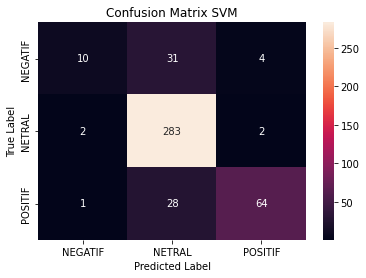

In [ ]:
# visualize classifier SVM algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_SVM)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# SVM RESULT
print("SVM RESULT")
print("Accuracy Score =",accuracy_score(predictions_SVM, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_SVM, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

SVM RESULT
Accuracy Score = 0.84
Precision = 0.8403112003235842
Recall = 0.84
F-score = 0.8160053841059153


In [ ]:
# Test model prediction to new sentence
texts = ["Vaccinations haven't gone well", 
         "good government",
         "Vaccination is going well",
         "The space shuttle is made in 2018", 
         "negative",
         "the windows are transparent."]

text_features = Tfidf_vect.transform(texts)
predictions = SVM.predict(text_features)
for text, predicted in zip(texts, predictions):
   print('"{}"'.format(text))
   print("  - Predicted as: '{}'".format(predicted))
   print("")

"Vaccinations haven't gone well"
  - Predicted as: '1'

"good government"
  - Predicted as: '2'

"Vaccination is going well"
  - Predicted as: '1'

"The space shuttle is made in 2018"
  - Predicted as: '1'

"negative"
  - Predicted as: '1'

"the windows are transparent."
  - Predicted as: '1'



# **Random-forest-Classifier Algorithm**
> **data training 70% dan data testing 30% dengan menjadikan test_size=0.3**


## **Random-forest-Classifier Algorithm**
> **Hyperparameter Tuning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [4,10]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# ------------------------------------------------------------------------------------------------------------

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False] 

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 112, 175, 237, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(Train_X_Tfidf, Train_Y)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 35, 60, 85, 110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 112, 175, 237, 300]},
             verbose=2)

In [ ]:
# print how our model looks after hyper-parameter tunning
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
#check accuracy
print (f'Train Accuracy - : {rf_Grid.score(Train_X_Tfidf,Train_Y):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(Test_X_Tfidf,Test_Y):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.892


> **Classifier - Random-forest Algorithm**

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn import model_selection

# fit the training dataset on the classifier
rf_clf = RandomForestClassifier(n_estimators=300, max_depth= None, max_features='sqrt', bootstrap=False, min_samples_leaf=1, min_samples_split=10)
rf_clf.fit(Train_X_Tfidf, Train_Y)

# predict the labels on validation dataset
predictions_RFC = rf_clf.predict(Test_X_Tfidf )

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

print("MAE:"+str(mean_absolute_error(Test_Y, predictions_RFC)))
print("RMSE:"+str(np.sqrt(mean_squared_error(Test_Y, predictions_RFC))))
print("MSE:"+str(mean_squared_error(Test_Y, predictions_RFC)))
# print("MSLE:"+str(mean_squared_log_error(Test_Y, predictions_RFC)))
# print("RMSLE:"+str(np.sqrt(mean_squared_log_error(Test_Y, predictions_RFC)))

MAE:0.11764705882352941
RMSE:0.3694192580731196
MSE:0.13647058823529412


> **Visualize Classifier - Random-forest Algorithm**

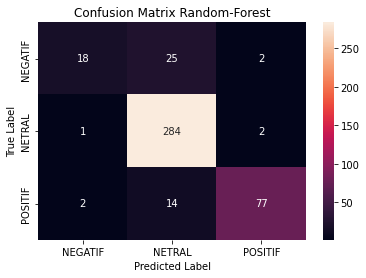

In [ ]:
# visualize classifier Random-forest algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_RFC)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix Random-Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# RANDOM FOREST RESULT
print("RANDOM FOREST RESULT")
print("Accuracy Score =",accuracy_score(predictions_RFC, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_RFC, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

RANDOM FOREST RESULT
Accuracy Score = 0.8917647058823529
Precision = 0.8925307887172758
Recall = 0.8917647058823529
F-score = 0.8802238673772608


In [ ]:
# Test model prediction to new sentence
texts = ["Vaccinations haven't gone well", 
         "good government",
         "Vaccination is going well",
         "The space shuttle is made in 2018", 
         "negative",
         "the windows are transparent."]

text_features = Tfidf_vect.transform(texts)
predictions = rf_clf.predict(text_features)
for text, predicted in zip(texts, predictions):
   print('"{}"'.format(text))
   print("  - Predicted as: '{}'".format(predicted))
   print("")

"Vaccinations haven't gone well"
  - Predicted as: '1'

"good government"
  - Predicted as: '2'

"Vaccination is going well"
  - Predicted as: '1'

"The space shuttle is made in 2018"
  - Predicted as: '1'

"negative"
  - Predicted as: '1'

"the windows are transparent."
  - Predicted as: '1'



<br>

--------------------------

# **SVM Classifier Algorithm (Support vector machine Algorithm)**
> **data training 80% dan data testing 20% dengan menjadikan test_size=0.2**


## **Hold-Out Method**

In [ ]:
corpus = pd.read_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/sample_reviews_2.1_nolemma.xlsx')

In [ ]:
corpus.head()

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity,label
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"['after', 'cross-state', 'allowed', 'no', 'roa...","[('after', 'IN'), ('cross-state', 'NN'), ('all...","['cross-state', 'allowed', 'roadblocks', 'chec...","['cross-stat', 'allow', 'roadblock', 'check', ...",0.0,netral
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"['keep', 'covid', 'vaccination', 'at', 'tangke...","[('keep', 'VB'), ('covid', 'NN'), ('vaccinatio...","['keep', 'covid', 'vaccination', 'tangkeliling...","['keep', 'covid', 'vaccin', 'tangkelil', 'pusk...",0.0,netral
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...,"['control', 'the', 'movement', 'of', 'those', ...","[('control', 'VB'), ('the', 'DT'), ('movement'...","['control', 'movement', 'refuse', 'receive', '...","['control', 'movement', 'refus', 'receiv', 'va...",0.0,netral
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...,"['vaccination', 'to', 'save', 'yourself', 'and...","[('vaccination', 'NN'), ('to', 'TO'), ('save',...","['vaccination', 'save', 'vaccine', 'family', '...","['vaccin', 'save', 'vaccin', 'famili', 'prove'...",0.5,positif
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...,"['important', 'vaccination', 'is', 'done', 'to...","[('important', 'JJ'), ('vaccination', 'NN'), (...","['important', 'vaccination', 'done', 'increase...","['import', 'vaccin', 'done', 'increas', 'bodi'...",0.0,netral


> **Text Classification dan Kalkulasi Akurasi**
- data training 80% dan data testing 20% dengan menjadikan test_size=0.2 

In [ ]:
#rename colume text_lemmatized into text_final
corpus = corpus.rename(columns={'text_stemmed':'text_final'})

#HOLD-OUT - Dividing testing and training data
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.2)
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.20, random_state=66)
Train_X,Test_X,Train_Y,Test_Y = train_test_split(corpus['text_final'],corpus['label'],test_size=0.2)

# Label encode - transform Categorical data of string (negatif, netral, positif) into numerical values (0,1,2)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
#TF-IDF Vectorizer 
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#CHECKING
print(Tfidf_vect.vocabulary_)
print(Train_X_Tfidf)

{'cross': 629, 'stat': 2707, 'allow': 89, 'roadblock': 2420, 'check': 473, 'person': 2101, 'either': 836, 'complet': 550, 'vaccin': 3047, 'keep': 1441, 'covid': 613, 'tangkelil': 2847, 'puskesk': 2287, 'build': 396, 'batu': 274, 'polic': 2163, 'chief': 476, 'personnel': 2102, 'pam': 2004, 'control': 582, 'movement': 1810, 'refus': 2352, 'receiv': 2336, 'inject': 1300, 'freedom': 1031, 'save': 2476, 'famili': 953, 'prove': 2257, 'safe': 2452, 'import': 1262, 'done': 767, 'increas': 1275, 'bodi': 354, 'immun': 1257, 'avoid': 211, 'spread': 2687, 'individu': 1283, 'take': 2832, 'still': 2716, 'countri': 606, 'need': 1865, 'adher': 37, 'exist': 921, 'sop': 2658, 'like': 1575, 'enthusiasm': 876, 'commun': 545, 'particip': 2032, 'high': 1184, 'proven': 2258, 'commemor': 539, 'tni': 2930, 'anniversari': 122, 'east': 823, 'java': 1364, 'region': 2357, 'appreci': 158, 'simultan': 2592, 'creation': 622, 'herd': 1178, 'pandem': 2012, 'humanitarian': 1228, 'problem': 2230, 'across': 25, 'nation': 

## **SVM Classifier Algorithm (Support vector machine Algorithm)**
> **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)

# fitting the model for grid search
grid.fit(Train_X_Tfidf, Train_Y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.664 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.664 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.664 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.664 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.661 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.661 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tunning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [ ]:
# re-run prediction model 
grid_predictions = grid.predict(Test_X_Tfidf)

#print classification report
print(classification_report(Test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.39      0.54        28
           1       0.88      0.98      0.92       193
           2       0.91      0.79      0.84        62

    accuracy                           0.88       283
   macro avg       0.88      0.72      0.77       283
weighted avg       0.88      0.88      0.87       283



In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

print("Check MAE, RMSE, MSE from the model")
print("MAE:"+str(mean_absolute_error(Test_Y, grid_predictions)))
print("RMSE:"+str(np.sqrt(mean_squared_error(Test_Y, grid_predictions))))
print("MSE:"+str(mean_squared_error(Test_Y, grid_predictions)))
# print("MSLE:"+str(mean_squared_log_error(Test_Y, grid_predictions)))
# print("RMSLE:"+str(np.sqrt(mean_squared_log_error(Test_Y, grid_predictions)))

Check MAE, RMSE, MSE from the model
MAE:0.13074204946996468
RMSE:0.38979925974471336
MSE:0.1519434628975265


> **Classifier - SVM Algorithm**

In [ ]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1000, kernel='rbf', gamma=0.01)
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

> **Visualize Classifier - SVM Algorithm**

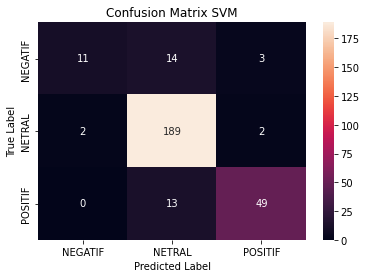

In [ ]:
# visualize classifier SVM algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_SVM)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# SVM RESULT
print("SVM RESULT")
print("Accuracy Score =",accuracy_score(predictions_SVM, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_SVM, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

SVM RESULT
Accuracy Score = 0.8798586572438163
Precision = 0.8792458196168443
Recall = 0.8798586572438163
F-score = 0.8684640944542026


In [ ]:
# Test model prediction to new sentence
texts = ["Vaccinations haven't gone well", 
         "good government",
         "Vaccination is going well",
         "The space shuttle is made in 2018", 
         "negative",
         "the windows are transparent."]

text_features = Tfidf_vect.transform(texts)
predictions = SVM.predict(text_features)
for text, predicted in zip(texts, predictions):
   print('"{}"'.format(text))
   print("  - Predicted as: '{}'".format(predicted))
   print("")

"Vaccinations haven't gone well"
  - Predicted as: '1'

"good government"
  - Predicted as: '2'

"Vaccination is going well"
  - Predicted as: '1'

"The space shuttle is made in 2018"
  - Predicted as: '1'

"negative"
  - Predicted as: '1'

"the windows are transparent."
  - Predicted as: '1'



# **Random-forest-Classifier Algorithm**
> **data training 80% dan data testing 20% dengan menjadikan test_size=0.2**


## **Random-forest-Classifier Algorithm**
> **Hyperparameter Tuning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [4,10]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# ------------------------------------------------------------------------------------------------------------

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False] 

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 112, 175, 237, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(Train_X_Tfidf, Train_Y)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 35, 60, 85, 110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 112, 175, 237, 300]},
             verbose=2)

In [ ]:
# print how our model looks after hyper-parameter tunning
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 112}

In [ ]:
#check accuracy
print (f'Train Accuracy - : {rf_Grid.score(Train_X_Tfidf,Train_Y ):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(Test_X_Tfidf,Test_Y):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.926


> **Classifier - Random-forest Algorithm**

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn import model_selection

# fit the training dataset on the classifier
rf_clf = RandomForestClassifier(n_estimators=237, max_depth= 110, max_features='auto', bootstrap=False, min_samples_leaf=1, min_samples_split=2)
rf_clf.fit(Train_X_Tfidf, Train_Y)

# predict the labels on validation dataset
predictions_RFC = rf_clf.predict(Test_X_Tfidf )

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

print("MAE:"+str(mean_absolute_error(Test_Y, predictions_RFC)))
print("RMSE:"+str(np.sqrt(mean_squared_error(Test_Y, predictions_RFC))))
print("MSE:"+str(mean_squared_error(Test_Y, predictions_RFC)))
# print("MSLE:"+str(mean_squared_log_error(Test_Y, predictions_RFC)))
# print("RMSLE:"+str(np.sqrt(mean_squared_log_error(Test_Y, predictions_RFC)))

MAE:0.0812720848056537
RMSE:0.3201148203898338
MSE:0.10247349823321555


> **Visualize Classifier - Random-forest Algorithm**

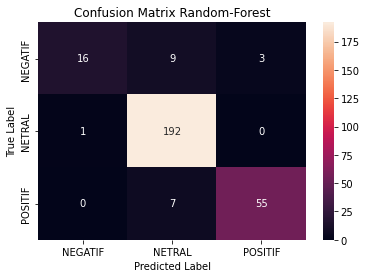

In [ ]:
# visualize classifier Random-forest algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_RFC)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix Random-Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# RANDOM FOREST RESULT
print("RANDOM FOREST RESULT")
print("Accuracy Score =",accuracy_score(predictions_RFC, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_RFC, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

RANDOM FOREST RESULT
Accuracy Score = 0.9293286219081273
Precision = 0.9303883066381364
Recall = 0.9293286219081273
F-score = 0.9242487616843247


In [ ]:
# Test model prediction to new sentence
texts = ["Vaccinations haven't gone well", 
         "good government",
         "Vaccination is going well",
         "The space shuttle is made in 2018", 
         "negative",
         "the windows are transparent."]

text_features = Tfidf_vect.transform(texts)
predictions = rf_clf.predict(text_features)
for text, predicted in zip(texts, predictions):
   print('"{}"'.format(text))
   print("  - Predicted as: '{}'".format(predicted))
   print("")

"Vaccinations haven't gone well"
  - Predicted as: '1'

"good government"
  - Predicted as: '2'

"Vaccination is going well"
  - Predicted as: '1'

"The space shuttle is made in 2018"
  - Predicted as: '1'

"negative"
  - Predicted as: '1'

"the windows are transparent."
  - Predicted as: '1'



<br>

------------------------------------------


#@Additional Experiment
### **Repository Draft for SVM and Random-forest-Classifier Algorithm**

In [ ]:
# !pip install Sastrawi
!pip install nltk

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install pydotplus

In [ ]:
#mount process for access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Library
import pandas as pd
import numpy as np
import string
import os
import re
from datetime import datetime

# Import matplotlib library for visualize the data
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# Import NLTK library - word_tokenize library for tokenization process using nltk
# for process of pos-tagging, lemmatization and cleaning the stopwords  
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Import Sklearn Library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn import model_selection, svm 
from sklearn import svm #for svm algorithm
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# ------------------------------------------------------------------------------------------------------------------------------------
# Additional library for data pre-processing process
import spacy
import csv

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, naive_bayes 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import pydotplus
#from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #import Indonesian Stemmer
from scipy.spatial import distance
from six import StringIO
from IPython.display import Image
porter_stemmer = PorterStemmer()

#for stopwords removal
from spacy.lang.en import English

#load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
from spacy.lang.en.stop_words import STOP_WORDS
sp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# **SVM Classifier Algorithm (Support vector machine Algorithm)**
> **data training 70% dan data testing 30% dengan menjadikan test_size=0.3**


## **Hold-Out Method**

In [ ]:
corpus = pd.read_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/sample_reviews_2.1_nolemma.xlsx')

In [ ]:
corpus.head()

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity,label
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"['after', 'cross-state', 'allowed', 'no', 'roa...","[('after', 'IN'), ('cross-state', 'NN'), ('all...","['cross-state', 'allowed', 'roadblocks', 'chec...","['cross-stat', 'allow', 'roadblock', 'check', ...",0.0,netral
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"['keep', 'covid', 'vaccination', 'at', 'tangke...","[('keep', 'VB'), ('covid', 'NN'), ('vaccinatio...","['keep', 'covid', 'vaccination', 'tangkeliling...","['keep', 'covid', 'vaccin', 'tangkelil', 'pusk...",0.0,netral
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...,"['control', 'the', 'movement', 'of', 'those', ...","[('control', 'VB'), ('the', 'DT'), ('movement'...","['control', 'movement', 'refuse', 'receive', '...","['control', 'movement', 'refus', 'receiv', 'va...",0.0,netral
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...,"['vaccination', 'to', 'save', 'yourself', 'and...","[('vaccination', 'NN'), ('to', 'TO'), ('save',...","['vaccination', 'save', 'vaccine', 'family', '...","['vaccin', 'save', 'vaccin', 'famili', 'prove'...",0.5,positif
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...,"['important', 'vaccination', 'is', 'done', 'to...","[('important', 'JJ'), ('vaccination', 'NN'), (...","['important', 'vaccination', 'done', 'increase...","['import', 'vaccin', 'done', 'increas', 'bodi'...",0.0,netral


> **Text Classification dan Kalkulasi Akurasi**
- data training 70% dan data testing 30% dengan menjadikan test_size=0.3 

In [ ]:
#rename colume text_lemmatized into text_final
corpus = corpus.rename(columns={'text_stemmed':'text_final'})

#HOLD-OUT - Dividing testing and training data
Train_X,Test_X,Train_Y,Test_Y = train_test_split(corpus['text_final'],corpus['label'],test_size=0.3)

# Label encode - transform Categorical data of string (negatif, netral, positif) into numerical values (0,1,2)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
#TF-IDF Vectorizer 
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#CHECKING
print(Tfidf_vect.vocabulary_)
print(Train_X_Tfidf)

{'cross': 629, 'stat': 2707, 'allow': 89, 'roadblock': 2420, 'check': 473, 'person': 2101, 'either': 836, 'complet': 550, 'vaccin': 3047, 'keep': 1441, 'covid': 613, 'tangkelil': 2847, 'puskesk': 2287, 'build': 396, 'batu': 274, 'polic': 2163, 'chief': 476, 'personnel': 2102, 'pam': 2004, 'control': 582, 'movement': 1810, 'refus': 2352, 'receiv': 2336, 'inject': 1300, 'freedom': 1031, 'save': 2476, 'famili': 953, 'prove': 2257, 'safe': 2452, 'import': 1262, 'done': 767, 'increas': 1275, 'bodi': 354, 'immun': 1257, 'avoid': 211, 'spread': 2687, 'individu': 1283, 'take': 2832, 'still': 2716, 'countri': 606, 'need': 1865, 'adher': 37, 'exist': 921, 'sop': 2658, 'like': 1575, 'enthusiasm': 876, 'commun': 545, 'particip': 2032, 'high': 1184, 'proven': 2258, 'commemor': 539, 'tni': 2930, 'anniversari': 122, 'east': 823, 'java': 1364, 'region': 2357, 'appreci': 158, 'simultan': 2592, 'creation': 622, 'herd': 1178, 'pandem': 2012, 'humanitarian': 1228, 'problem': 2230, 'across': 25, 'nation': 

## **SVM Classifier Algorithm (Support vector machine Algorithm)**

In [ ]:
# fit the training dataset on the classifier
#SVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale')
SVM = svm.SVC()
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

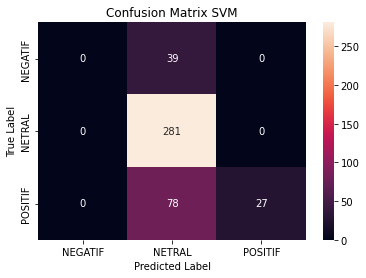

In [ ]:
# visualize classifier SVM algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_SVM)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# SVM RESULT
print("SVM RESULT")
print("Accuracy Score =",accuracy_score(predictions_SVM, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_SVM, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

SVM RESULT
Accuracy Score = 0.7247058823529412
Precision = 0.7138693467336683
Recall = 0.7247058823529412
F-score = 0.6483172012947634


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Random-forest-Classifier Algorithm**
> **data training 70% dan data testing 30% dengan menjadikan test_size=0.3**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

> **Classifier - Random-forest Algorithm**

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn import model_selection

# fit the training dataset on the classifier
# rf_clf = RandomForestClassifier(n_estimators=100, max_depth= 'None', max_features='auto', bootstrap=True, min_samples_leaf=1, min_samples_split=2)
rf_clf = RandomForestClassifier()
rf_clf.fit(Train_X_Tfidf, Train_Y)

# predict the labels on validation dataset
predictions_RFC = rf_clf.predict(Test_X_Tfidf )

> **Visualize Classifier - Random-forest Algorithm**

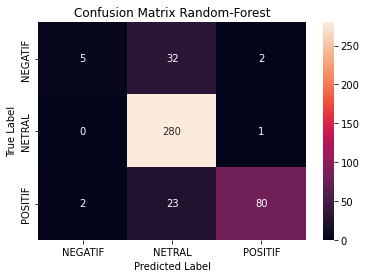

In [ ]:
# visualize classifier Random-forest algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_RFC)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix Random-Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# RANDOM FOREST RESULT
print("RANDOM FOREST RESULT")
print("Accuracy Score =",accuracy_score(predictions_RFC, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_RFC, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

RANDOM FOREST RESULT
Accuracy Score = 0.8588235294117647
Precision = 0.8563003147671583
Recall = 0.8588235294117647
F-score = 0.8312811963571063


# **SVM Classifier Algorithm (Support vector machine Algorithm)**
> **data training 80% dan data testing 20% dengan menjadikan test_size=0.2**


## **Hold-Out Method**

In [ ]:
corpus = pd.read_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/sample_reviews_2.1_nolemma.xlsx')

In [ ]:
corpus.head()

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity,label
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"['after', 'cross-state', 'allowed', 'no', 'roa...","[('after', 'IN'), ('cross-state', 'NN'), ('all...","['cross-state', 'allowed', 'roadblocks', 'chec...","['cross-stat', 'allow', 'roadblock', 'check', ...",0.0,netral
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"['keep', 'covid', 'vaccination', 'at', 'tangke...","[('keep', 'VB'), ('covid', 'NN'), ('vaccinatio...","['keep', 'covid', 'vaccination', 'tangkeliling...","['keep', 'covid', 'vaccin', 'tangkelil', 'pusk...",0.0,netral
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...,"['control', 'the', 'movement', 'of', 'those', ...","[('control', 'VB'), ('the', 'DT'), ('movement'...","['control', 'movement', 'refuse', 'receive', '...","['control', 'movement', 'refus', 'receiv', 'va...",0.0,netral
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...,"['vaccination', 'to', 'save', 'yourself', 'and...","[('vaccination', 'NN'), ('to', 'TO'), ('save',...","['vaccination', 'save', 'vaccine', 'family', '...","['vaccin', 'save', 'vaccin', 'famili', 'prove'...",0.5,positif
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...,"['important', 'vaccination', 'is', 'done', 'to...","[('important', 'JJ'), ('vaccination', 'NN'), (...","['important', 'vaccination', 'done', 'increase...","['import', 'vaccin', 'done', 'increas', 'bodi'...",0.0,netral


> **Text Classification dan Kalkulasi Akurasi**
- data training 80% dan data testing 20% dengan menjadikan test_size=0.2

In [ ]:
#rename colume text_lemmatized into text_final
corpus = corpus.rename(columns={'text_stemmed':'text_final'})

#HOLD-OUT - Dividing testing and training data
Train_X,Test_X,Train_Y,Test_Y = train_test_split(corpus['text_final'],corpus['label'],test_size=0.2)

# Label encode - transform Categorical data of string (negatif, netral, positif) into numerical values (0,1,2)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
#TF-IDF Vectorizer 
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#CHECKING
print(Tfidf_vect.vocabulary_)
print(Train_X_Tfidf)

{'cross': 629, 'stat': 2707, 'allow': 89, 'roadblock': 2420, 'check': 473, 'person': 2101, 'either': 836, 'complet': 550, 'vaccin': 3047, 'keep': 1441, 'covid': 613, 'tangkelil': 2847, 'puskesk': 2287, 'build': 396, 'batu': 274, 'polic': 2163, 'chief': 476, 'personnel': 2102, 'pam': 2004, 'control': 582, 'movement': 1810, 'refus': 2352, 'receiv': 2336, 'inject': 1300, 'freedom': 1031, 'save': 2476, 'famili': 953, 'prove': 2257, 'safe': 2452, 'import': 1262, 'done': 767, 'increas': 1275, 'bodi': 354, 'immun': 1257, 'avoid': 211, 'spread': 2687, 'individu': 1283, 'take': 2832, 'still': 2716, 'countri': 606, 'need': 1865, 'adher': 37, 'exist': 921, 'sop': 2658, 'like': 1575, 'enthusiasm': 876, 'commun': 545, 'particip': 2032, 'high': 1184, 'proven': 2258, 'commemor': 539, 'tni': 2930, 'anniversari': 122, 'east': 823, 'java': 1364, 'region': 2357, 'appreci': 158, 'simultan': 2592, 'creation': 622, 'herd': 1178, 'pandem': 2012, 'humanitarian': 1228, 'problem': 2230, 'across': 25, 'nation': 

## **SVM Classifier Algorithm (Support vector machine Algorithm)**

In [ ]:
# fit the training dataset on the classifier
#SVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale')
SVM = svm.SVC()
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

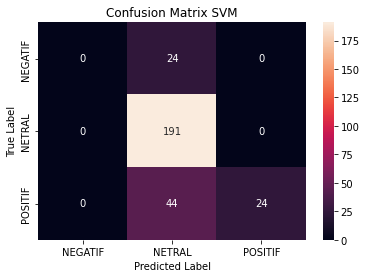

In [ ]:
# visualize classifier SVM algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_SVM)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# SVM RESULT
print("SVM RESULT")
print("Accuracy Score =",accuracy_score(predictions_SVM, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_SVM, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

SVM RESULT
Accuracy Score = 0.7597173144876325
Precision = 0.7379974623790878
Recall = 0.7597173144876325
F-score = 0.6982898892132261


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Random-forest-Classifier Algorithm**
> **data training 80% dan data testing 20% dengan menjadikan test_size=0.2**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

> **Classifier - Random-forest Algorithm**

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn import model_selection

# fit the training dataset on the classifier
# rf_clf = RandomForestClassifier(n_estimators=100, max_depth= 'None', max_features='auto', bootstrap=True, min_samples_leaf=1, min_samples_split=2)
rf_clf = RandomForestClassifier()
rf_clf.fit(Train_X_Tfidf, Train_Y)

# predict the labels on validation dataset
predictions_RFC = rf_clf.predict(Test_X_Tfidf )

> **Visualize Classifier - Random-forest Algorithm**

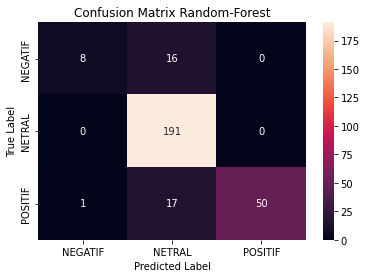

In [ ]:
# visualize classifier Random-forest algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_RFC)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix Random-Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# RANDOM FOREST RESULT
print("RANDOM FOREST RESULT")
print("Accuracy Score =",accuracy_score(predictions_RFC, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_RFC, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

RANDOM FOREST RESULT
Accuracy Score = 0.8798586572438163
Precision = 0.8911481995625106
Recall = 0.8798586572438163
F-score = 0.8659912737568992
